# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Professor Reponsavel:** Prof. Dr. André Carlos Ponce de Leon Ferreira de Carvalho
📧 andre@icmc.usp.br
🌐 [linkedin](https://www.linkedin.com/in/andr%C3%A9-carlos-ponce-de-leon-f-de-carvalho-151bb26/)
🔗 [site](http://www.cemeai.icmc.usp.br/component/teamdisplay/108)

# Prática: Predição de abandono de produto de crédito usando o algoritmo Multilayer Perceptron

**Autor:** Edesio Alcobaça
📧 edesio@usp.br
🌐 [linkedin](https://www.linkedin.com/in/ealcobaca/)
🔗 [site](https://ealcobaca.github.io/)

## Descrição & Objetivo

**Descrição dos Dados:** Uma empresa possui um produto de cartão de crédito muito conhecido no mercado. Contudo, dada a alta competitividade, a empresa percebeu que seus clientes começaram a abandonar seu produto. A empresa contratou você para modelar quais clientes provavelmente irão abandonar o produto, para que ela interfira proativamente evitando a perda dos clientes. Os dados disponibilizados possuem diversas características dos clientes (e.g., sexo, idade, estado civil, escolaridade) e do uso do produto de crédito (e.g., limite do cartão, tipo do cartão). A coluna `Attrition_Flag` indica se o cliente abandonou ou não o produto.

**Objetivo:** Modelar o problema com MLP de forma a retornar uma lista ordenada de clientes, do mais ao menos provável a abandonar o produto.

# 1. Leitura dos Dados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [2]:
# Leitura de dados
data = pd.read_csv("credit_card_churn_data.csv")

target = 'Attrition_Flag'

categorical_features = ['Gender',  'Education_Level',
                        'Marital_Status', 'Income_Category', 'Card_Category'
                        ]

numerical_features = ['Dependent_count', 'Customer_Age',  'Months_on_book',
                      'Total_Relationship_Count', 'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                      'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                      'Avg_Utilization_Ratio'
                      ]
data

,Dependent_count,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,3,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,5,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,3,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,4,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,3,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,2,50,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,Existing Customer
10123,2,41,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,Attrited Customer
10124,1,44,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,Attrited Customer
10125,2,30,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,Attrited Customer


# 2. Análise Exploratória dos Dados


In [3]:
# Número de exemplos e features
data.shape

(10127, 20)

In [4]:
# Contar classes
data[target].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [5]:
# Porcentagem de exemplos de cada classe
data[target].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [6]:
# Verificar se tem NaN
data.isna().sum()

Dependent_count             0
Customer_Age                0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Attrition_Flag              0
dtype: int64

In [7]:
# Descrever dados categóricos
data.describe(include=[object])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
count,10127,10127,10127,10127,10127,10127
unique,2,7,4,6,4,2
top,F,Graduate,Married,Less than $40K,Blue,Existing Customer
freq,5358,3128,4687,3561,9436,8500


In [8]:
# Descrever dados numéricos
data.describe(include=[np.number])


,Dependent_count,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,2.346203,46.325960,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,1.298908,8.016814,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,2.000000,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,3.000000,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,5.000000,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# 3. Modelagem & Avaliação

## 3.1 Baseline

In [9]:
# Separar os dados em treinamento e teste

X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [10]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# zscore para mudar escala os dados
scaler = StandardScaler()

# modelo baseline
lrc = LogisticRegression(random_state=42)

# pipeline de machine learning
pipeb = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', lrc)
])

# cross validação da solução
cv_list_lr_baseline = cross_val_score(
    pipeb,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

In [11]:
mean_cv_lr_baseline = np.mean(cv_list_lr_baseline)
std_cv_lr_baseline = np.std(cv_list_lr_baseline)

print(f"Performance (bac): {round(mean_cv_lr_baseline, 4)} +- {round(std_cv_lr_baseline, 4)}")

Performance (bac): 0.7834 +- 0.0227


# 3.2 Modelando com MLP

![title](https://uploads-ssl.webflow.com/5e6b6ac0d1fd2b1f242cc0cb/5f201fc59a54002670de36a4_5eac2bb7d3cad50315947c84_Untitled-3.jpg)


### 1 camada oculta --> (10, )

In [12]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# minmax para mudar escala os dados
scaler = MinMaxScaler()

# modelo baseline
mlp = MLPClassifier(
    hidden_layer_sizes=(10,), # numero de neurônios 
    activation = "relu", # função de ativação para a camada oculta
                         # As possibilidades são: identity, logistic, tanh e relu
    alpha=0.0001, # Força do termo regularizador L2.
    solver="adam", # otimizador
    batch_size="auto", # Tamanho do mini-batch para otimizadores estocásticos
    learning_rate_init= 0.01, # taxa de aprendizado inicial. Ele controla o tamanho do passo na atualização dos pesos
    learning_rate="constant", # possibilidades: constant, invscaling, adaptative
    early_stopping=False, # Se a interrupção antecipada deve ser usada para encerrar
                          # o treinamento quando a performance de validação não estiver melhorando.
    max_iter=200, # número de iterações do otimizador
    random_state=0
    )

# pipeline de machine learning
pipe1 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', mlp)
])

# cross validação da solução
cv_list_pipe1_baseline = cross_val_score(
    pipe1,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe1_baseline = np.mean(cv_list_pipe1_baseline)
std_cv_pipe1_baseline = np.std(cv_list_pipe1_baseline)

print(f"Performance (bac): {round(mean_cv_pipe1_baseline, 4)} +- {round(std_cv_pipe1_baseline, 4)}")

Performance (bac): 0.8612 +- 0.0277


### 2 camada oculta --> (10, 10)


In [13]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# minmax para mudar escala os dados
scaler = MinMaxScaler()

# modelo baseline
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10), # número de neurônios 
    activation = "relu", # função de ativação para a camada oculta
                         # As possibilidades são: identity, logistic, tanh e relu
    alpha=0.0001, # Força do termo regularizador L2.
    solver="adam", # otimizador
    batch_size="auto", # Tamanho do mini-batch para otimizadores estocásticos
    learning_rate_init= 0.01, # taxa de aprendizado inicial. Ele controla o tamanho do passo na atualização dos pesos
    learning_rate="constant", # possibilidades: constant, invscaling, adaptative
    early_stopping=False, # Se a interrupção antecipada deve ser usada para encerrar
                          # o treinamento quando a performance de validação não estiver melhorando.
    max_iter=200, # número de iterações do otimizador
    random_state=0
    )

# pipeline de machine learning
pipe2 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', mlp)
])

# cross validação da solução
cv_list_pipe2_baseline = cross_val_score(
    pipe2,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe2_baseline = np.mean(cv_list_pipe2_baseline)
std_cv_pipe2_baseline = np.std(cv_list_pipe2_baseline)

print(f"Performance (bac): {round(mean_cv_pipe2_baseline, 4)} +- {round(std_cv_pipe2_baseline, 4)}")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Performance (bac): 0.8679 +- 0.0367


### 3 camada oculta --> (10, 10, 10)


In [14]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# minmax para mudar escala os dados
scaler = MinMaxScaler()

# modelo baseline
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10, 10), # número de neurônios 
    activation = "relu", # função de ativação para a camada oculta
                         # As possibilidades são: identity, logistic, tanh e relu
    alpha=0.0001, # Força do termo regularizador L2.
    solver="adam", # otimizador
    batch_size="auto", # Tamanho do mini-batch para otimizadores estocásticos
    learning_rate_init= 0.01, # taxa de aprendizado inicial. Ele controla o tamanho do passo na atualização dos pesos
    learning_rate="constant", # possibilidades: constant, invscaling, adaptative
    early_stopping=False, # Se a interrupção antecipada deve ser usada para encerrar
                          # o treinamento quando a performance de validação não estiver melhorando.
    max_iter=200, # número de iterações do otimizador
    random_state=0
    )

# pipeline de machine learning
pipe3 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', mlp)
])

# cross validação da solução
cv_list_pipe3_baseline = cross_val_score(
    pipe3,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe3_baseline = np.mean(cv_list_pipe3_baseline)
std_cv_pipe3_baseline = np.std(cv_list_pipe3_baseline)

print(f"Performance (bac): {round(mean_cv_pipe3_baseline, 4)} +- {round(std_cv_pipe3_baseline, 4)}")

Performance (bac): 0.9082 +- 0.0129


### 4 camada oculta --> (10, 10, 10, 10)


In [15]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# zscore para mudar escala os dados
scaler = MinMaxScaler()

# modelo baseline
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10, 10, 10), # número de neurônios 
    activation = "relu", # função de ativação para a camada oculta
                         # As possibilidades são: identity, logistic, tanh e relu
    alpha=0.0001, # Força do termo regularizador L2.
    solver="adam", # otimizador
    batch_size="auto", # Tamanho do mini-batch para otimizadores estocásticos
    learning_rate_init= 0.01, # taxa de aprendizado inicial. Ele controla o tamanho do passo na atualização dos pesos
    learning_rate="constant", # possibilidades: constant, invscaling, adaptative
    early_stopping=False, # Se a interrupção antecipada deve ser usada para encerrar
                          # o treinamento quando a performance de validação não estiver melhorando.
    max_iter=200, # número de iterações do otimizador
    random_state=0
    )

# pipeline de machine learning
pipe4 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', mlp)
])

# cross validação da solução
cv_list_pipe4_baseline = cross_val_score(
    pipe4,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe4_baseline = np.mean(cv_list_pipe4_baseline)
std_cv_pipe4_baseline = np.std(cv_list_pipe4_baseline)

print(f"Performance (bac): {round(mean_cv_pipe4_baseline, 4)} +- {round(std_cv_pipe4_baseline, 4)}")

Performance (bac): 0.8684 +- 0.0163


# Avaliação Experimental


In [16]:
# resultados da cross-validação

df_result_cv = pd.DataFrame(
    [cv_list_lr_baseline, cv_list_pipe1_baseline, cv_list_pipe2_baseline, cv_list_pipe3_baseline, cv_list_pipe4_baseline],
    index=["baseline","MLP(10,)", "MLP(10, 10)", "MLP(10, 10, 10)", "MLP(10, 10, 10, 10)"]
).T

df_result_cv

,baseline,"MLP(10,)","MLP(10, 10)","MLP(10, 10, 10)","MLP(10, 10, 10, 10)"
0,0.761374,0.822778,0.853008,0.899676,0.872232
1,0.765576,0.830341,0.863092,0.911337,0.833886
2,0.768097,0.863092,0.853111,0.880267,0.866453
3,0.777053,0.908448,0.892769,0.905558,0.862067
4,0.777053,0.872520,0.879979,0.923286,0.896970
5,0.782279,0.834911,0.816342,0.901356,0.883341
6,0.836776,0.887542,0.889776,0.923470,0.868974
7,0.777893,0.849093,0.800295,0.903590,0.857865
8,0.815479,0.895800,0.919059,0.908426,0.882111
9,0.772090,0.847929,0.912003,0.924831,0.860140


In [17]:
# linearizar matriz
df_res = df_result_cv.stack().to_frame("balanced_accuracy")
df_res.index.rename(["fold", "pipelines"], inplace=True)
df_res = df_res.reset_index()
df_res.head(12)

,fold,pipelines,balanced_accuracy
0,0,baseline,0.761374
1,0,"MLP(10,)",0.822778
2,0,"MLP(10, 10)",0.853008
3,0,"MLP(10, 10, 10)",0.899676
4,0,"MLP(10, 10, 10, 10)",0.872232
5,1,baseline,0.765576
6,1,"MLP(10,)",0.830341
7,1,"MLP(10, 10)",0.863092
8,1,"MLP(10, 10, 10)",0.911337
9,1,"MLP(10, 10, 10, 10)",0.833886


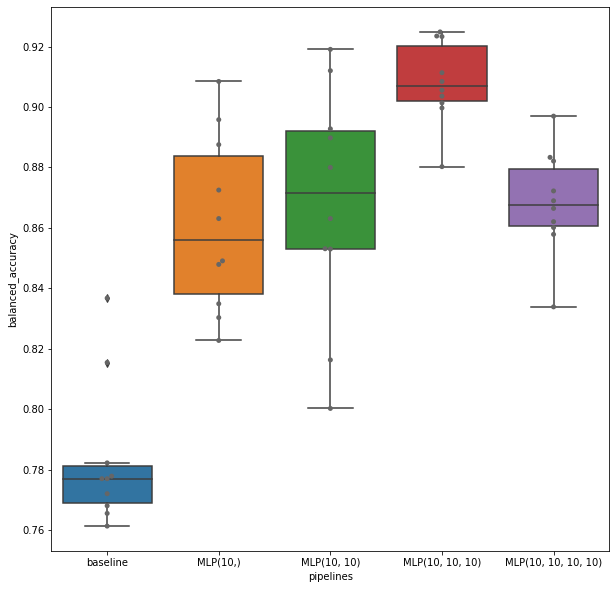

In [18]:
plt.figure(figsize=(10,10))

ax = sns.boxplot(x="pipelines", y="balanced_accuracy", data=df_res)
ax = sns.swarmplot(x="pipelines", y="balanced_accuracy", data=df_res, color=".40")

### ROC curve

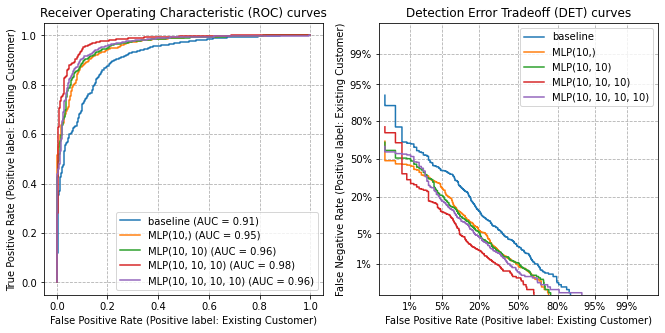

In [19]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

pipelines = {
    "baseline": pipeb,
    "MLP(10,)": pipe1,
    "MLP(10, 10)": pipe2,
    "MLP(10, 10, 10)": pipe3,
    "MLP(10, 10, 10, 10)": pipe4,
}

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in pipelines.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

### Final pipeline

In [20]:
# retreinar o pipeline selecionado com todos os dados de treinamento

pipe3.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
bac = balanced_accuracy_score(y_test, y_pred) 

print("Performance: ", round(bac, 4))


Performance:  0.8441


In [21]:
# Em vez de usar as predições podemos usar a probabilidade
# Desta maneira conseguiremos construir uma lista, ordenando dos mais aos menos prováveis de abandonar o produto

y_pred_prob = pipe3.predict_proba(X_test)
y_pred_prob[:, 0]

array([4.96625438e-05, 1.80525853e-03, 9.37936844e-01, ...,
       1.35154815e-02, 7.06941771e-07, 6.21152944e-04])

## Referências & Links



1. [Multilayer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
2. [Credit Card Customer Data](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)
3. [Multilayer Perceptron Explained with a Real-Life Example and Python Code: Sentiment Analysis)](https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141)


<font size="1"> © <a href="https://github.com/ealcobaca">ealcobaca</a> *(2022)* </font>